In [1]:
# Reading Data
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import math

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs_dict = pickle.load(infile)

infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd_dict = pickle.load(infile)


Text(0, 0.5, 'Counts')

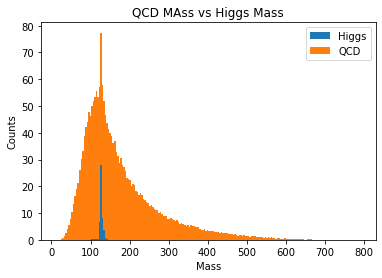

In [8]:
# Problem 1:

higgs_mass = higgs_dict['mass']
qcd_mass = qcd_dict['mass']

data = [higgs_mass, qcd_mass]
higgs_rescale_factor = 50 / 100000
qcd_rescale_factor = 2000 / 100000

higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_dict['mass']))
qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_dict['mass']))


heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights], label=['Higgs', 'QCD'])
qcd_mean = sum(heights[1])
higgs_mean = sum(heights[0])
plt.title('QCD MAss vs Higgs Mass')
plt.legend()
plt.xlabel('Mass')
plt.ylabel('Counts')

In [9]:
# Calculate Significance

probability = stats.poisson.sf(qcd_mean, mu=qcd_mean - higgs_mean)
sigma = stats.norm.isf(probability)
print('Significance: ', str(sigma))

Significance:  1.1060461130668817


In [10]:
expected_sigma = 50 / math.sqrt(2000)
print(expected_sigma)

1.118033988749895


Problem 1.1

The calculated and expected significance for the data are equivalent. (explain why later)

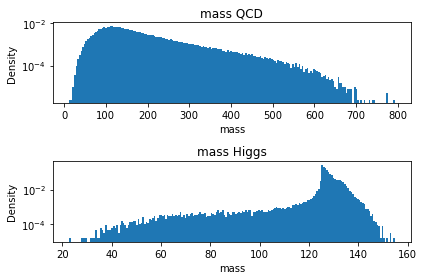

In [11]:
# Problem 2

fig, ax = plt.subplots(2)
ax[0].hist(qcd_dict['mass'], bins=200, density=True)
ax[1].hist(higgs_dict['mass'], bins=200, density=True)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_title('mass QCD')
ax[1].set_title('mass Higgs')
ax[0].set_xlabel('mass')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('mass')
ax[1].set_ylabel('Density')
plt.tight_layout()

From this plot, we can see that the higgs data lies solely between a subset of the QCD data. To start off I will make an intitial cut of the QCD data, to be between 20, and 160, as including ranges outside of this in future cuts, won't contain any of the expected higgs data, and not increase significance by as much.

Text(0, 0.5, 'Counts')

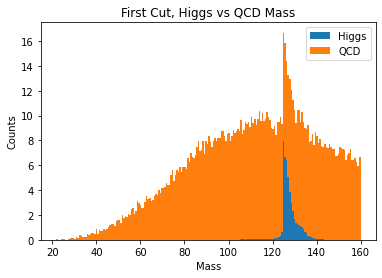

In [12]:
qcd_initial_cut = [i for i in qcd_mass if i > 20 and i < 160]
qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_initial_cut))
data = [higgs_mass, qcd_initial_cut]
heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights], label=['Higgs', 'QCD'])
plt.title('First Cut, Higgs vs QCD Mass')
plt.legend()
plt.xlabel('Mass')
plt.ylabel('Counts')

In [13]:
mean_higgs = sum(heights[0])
mean_qcd = sum(heights[1])
probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
sigma = stats.norm.isf(probability)
print('Significance: ', str(sigma))

Significance:  1.4988636517683895


The next cut I will be mass values between 120, and 140. This will still preserve the majority of higgs events, as that is where they lie. It will also serve to cut down a significant amount of the background.

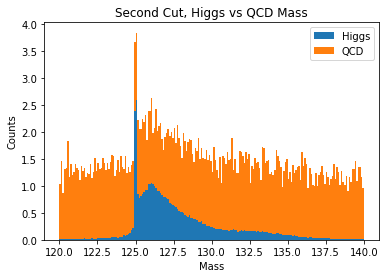

In [14]:
qcd_second_cut = [i for i in qcd_mass if i > 120 and i < 140]
higgs_cut = [i for i in higgs_mass if i > 120 and i < 140]
qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_second_cut))
higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_cut))
data = [higgs_cut, qcd_second_cut]
heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights], label=['Higgs', 'QCD'])
plt.title('Second Cut, Higgs vs QCD Mass')
plt.xlabel('Mass')
plt.ylabel('Counts')
plt.legend()

In [15]:
mean_higgs = sum(heights[0])
mean_qcd = sum(heights[1])
probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
sigma = stats.norm.isf(probability)
print('Significance: ', str(sigma))

Significance:  2.90654815722082


The next cut I will make, is cut values below 125, this will remove the tail from the higgs data while preserving the spike. It will also remove more of the background. Then I will make cuts decreasing the maximum mass in the cut by 1, and choose the cut that contains the highest significance.

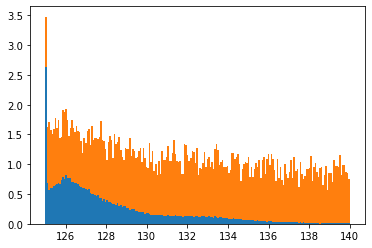

In [16]:
qcd_third_cut = [i for i in qcd_mass if i > 125 and i < 140]
higgs_second_cut = [i for i in higgs_mass if i > 125 and i < 140]
qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_third_cut))
higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_second_cut))
data = [higgs_second_cut, qcd_third_cut]
heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights])

In [17]:
mean_higgs = sum(heights[0])
mean_qcd = sum(heights[1])
probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
sigma = stats.norm.isf(probability)
print('Significance: ', str(sigma))

Significance:  3.055937423126392


In [18]:
for i in range(1, 15):
    qcd_cut = [j for j in qcd_mass if j > 125 and j < (140 - i)]
    higgs_cut = [j for j in higgs_mass if j > 125 and j < (140 - i)]
    qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_cut))
    higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_cut))
    qcd_heights, temp1 = np.histogram(qcd_cut, 200, weights=qcd_weights)
    higgs_heights, temp2 = np.histogram(higgs_cut, 200, weights=higgs_weights)
    mean_qcd = sum(qcd_heights)
    mean_higgs = sum(higgs_heights)
    probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
    sigma = stats.norm.isf(probability)
    print('Significance: ', str(sigma), ' min mass: ', str(125), ' max mass: ', str(140 - i))

Significance:  3.6315988480985717  min mass:  125  max mass:  139
Significance:  3.796047147378383  min mass:  125  max mass:  138
Significance:  3.8989845321000023  min mass:  125  max mass:  137
Significance:  4.0192290452012065  min mass:  125  max mass:  136
Significance:  4.193574353075133  min mass:  125  max mass:  135
Significance:  4.434676563634159  min mass:  125  max mass:  134
Significance:  4.575626114181664  min mass:  125  max mass:  133
Significance:  4.740933034841751  min mass:  125  max mass:  132
Significance:  5.066401573329015  min mass:  125  max mass:  131
Significance:  5.39704430860755  min mass:  125  max mass:  130
Significance:  5.8160456540953405  min mass:  125  max mass:  129
Significance:  6.201462081080121  min mass:  125  max mass:  128
Significance:  6.636081335024552  min mass:  125  max mass:  127
Significance:  5.17334728523064  min mass:  125  max mass:  126


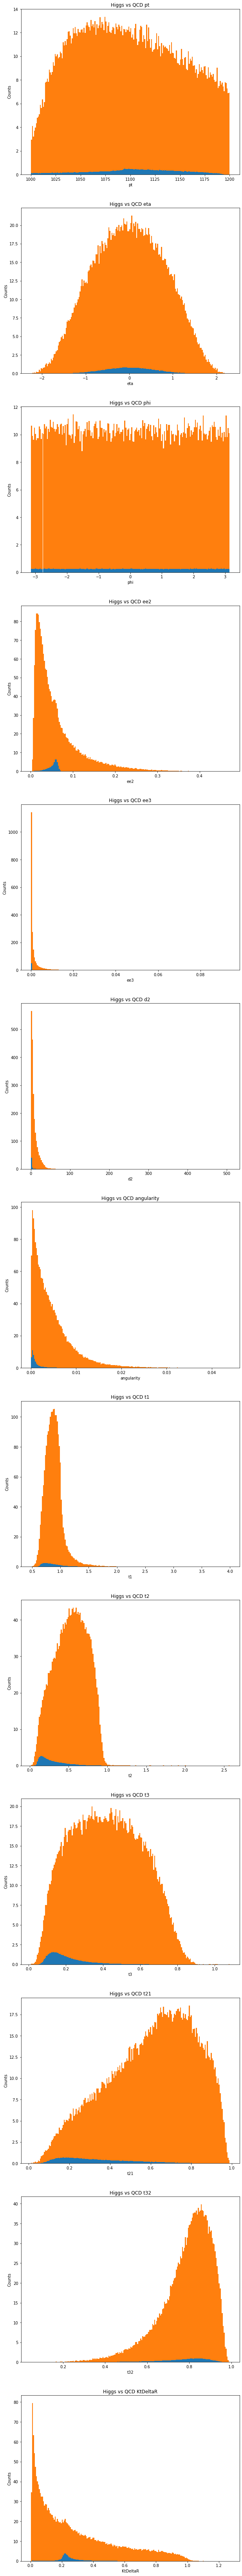

In [22]:
# Problem 3.A
fig, ax = plt.subplots(13, figsize=(10,120))
count = 0
for var in qcd_dict:
    if var != 'mass':
        higgs = higgs_dict[var]
        qcd = qcd_dict[var]

        data = [higgs, qcd]
        higgs_rescale_factor = 50 / 100000
        qcd_rescale_factor = 2000 / 100000

        higgs_weights = np.repeat(higgs_rescale_factor, len(higgs))
        qcd_weights = np.repeat(qcd_rescale_factor, len(qcd))


        heights, temp1, temp2 = ax[count].hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights])
        ax[count].set_xlabel(var)
        ax[count].set_ylabel('Counts')
        ax[count].set_title(f'Higgs vs QCD {var}')
        count += 1
    
    
    

In [ ]:
# Problem 3.B

